<a href="https://colab.research.google.com/github/ShabanaNaik/IBM-Project-18824-1659690548-UAE-Predictor-/blob/m-updates/Graduate_Admission_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Reading the Dataset
data= pd.read_csv(r"/content/Admission_Predict.csv")

## Analysing the Data

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [11]:
data.shape

(400, 9)

In [12]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
ids = data["Serial No."]
data[ids.isin(ids[ids.duplicated()])].sort_values("Serial No.")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Observations on data types of the features :

* All the data is in numeric format.
* All the features have 500 observations as non null. This gives a good confidance to the data for outlier handling.
* To confirm, data can be cross check again for nulls, nans and outliers.











In [17]:
# Dropping Serial No. from the data 
data = data.drop(["Serial No."], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
# Checking for null value
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## Descriptive Statistics for the data 

In [20]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.81,11.47,290.00,308.00,317.00,325.00,340.00
TOEFL Score,400.0,107.41,6.07,92.00,103.00,107.00,112.00,120.00
University Rating,400.0,3.09,1.14,1.00,2.00,3.00,4.00,5.00
SOP,400.0,3.40,1.01,1.00,2.50,3.50,4.00,5.00
LOR,400.0,3.45,0.90,1.00,3.00,3.50,4.00,5.00
CGPA,400.0,8.60,0.60,6.80,8.17,8.61,9.06,9.92
Research,400.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Chance of Admit,400.0,0.72,0.14,0.34,0.64,0.73,0.83,0.97


### Observations from 5 point description of data :


* Since all the features are numeric in nature, simply using count, mean, std-dev, minimum, maximum, 25th percentile, 50th percentile (median) and 75th percentile will be enough to understand the data.

* GRE Score: Has observed mean score at 316 out of 340 with standard deviation of 11.30. For the same minimum score observed at 290/340 and maximum score at 340/340. And and range 25th to 75th percentile is [308 - 325].

* TOEFL Score: Has observed mean score at 107/120 with standard deviation of 6.08. For the same minimum score observed at 92/120 and maximum score at 120/120. And and range 25th to 75th percentile is [103 - 112].

* University Rating: Average rating of universities is 3.11 with a standard deviation 1.14. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2 and 4 respectively. *

* SOP Statement of Purpose : Average rating of SOP is 3.37 with a standard deviation 0.99. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2.50 and 4 respectively. *
* LOR Letter of Recommendation Strength : Average rating of LOR is 3.48 with a standard deviation 0.93. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 3 and 4 respectively. *

* CGPA : Average CGPA score is 8.58/10 with a standard deviation 0.60. For the same minimum score observed at 6.80/10 and maximum score at 9.92/10. And the range of 25th to 75th percentile is [8.13- 9.04].

* Research : This is a binary status feature with value 0 or 1. And to analyse this 5 point description is not very good tool and will be further anlysed in EDA as categorical variable. The only input we can take from this is mean is 0.56, suggesting 56% has opted in research.

* Chance of Admit : The mean value is observed at 0.72 with a standard deviation of 0.14. For the same minimum is observed at 0.34 and maximum is observed at 0.97. And the range of 25th and 75th percentile is [0.63-0.82].

Note - Since ratings are fixed range of [1-5] it will be treated as categorical feature for further Explorative analysis




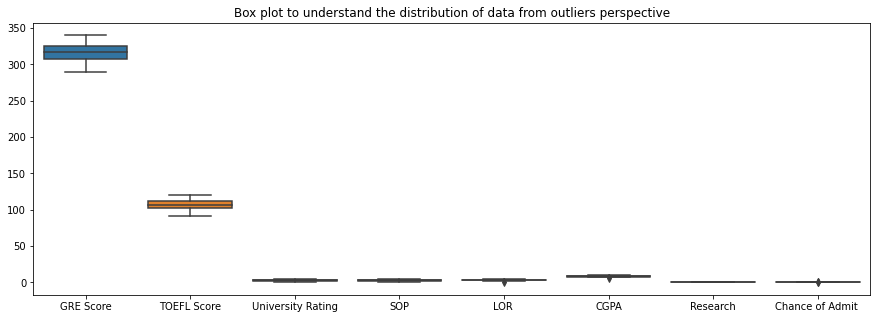

In [21]:
##Outlier detection :
plt.figure(figsize=(15,5))
sns.boxplot(data = data);
plt.title("Box plot to understand the distribution of data from outliers perspective");
